### Задание 1
Загрузить данные из файла `insurance.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/insurance.csv")

### Задание 2
С помощью метода `describe()` посмотреть статистику по данным. Сделать выводы.

In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Задание 3
Построить гистограммы для числовых показателей. Сделать выводы.

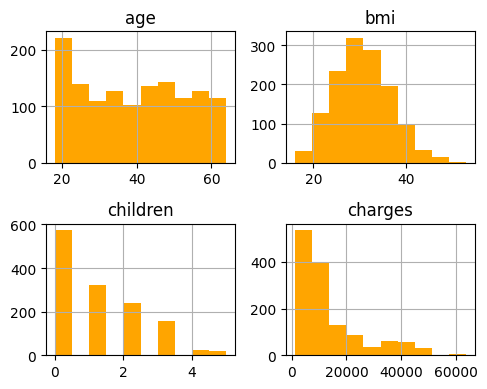

In [3]:
df.hist(figsize=(5, 4), color='orange')
plt.tight_layout()
plt.show()

### Задание 4
Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы.

In [4]:
def printMeasures(mean, mode, median, stddev, range, iqr_np, irq_sp):
    print(f'Mean:   {mean:.3f}\n'
          f'Mode:   {mode:.3f}\n'
          f'Median: {median:.3f}\n')
    print(f'Range:          {range:.3f}\n'
          f'Std. deviation: {stddev:.3f}\n'
          f'IQR (numpy):    {iqr_np:.3f}\n'
          f'IQR (scipy):    {irq_sp:.3f}')


def buildGraph(mean, mode, median, var, title):
    df[var].hist(color='orange')
    plt.xlabel(title, fontsize=12)
    plt.axvline(label='Mean', x=[mean],   ymin=0, ymax=330, linestyle='--', color='blue')
    plt.axvline(label='Mode', x=[mode],   ymin=0, ymax=330, linestyle='--', color='green')
    plt.axvline(label='Median', x=[median], ymin=0, ymax=330, linestyle='--', color='purple')
    plt.legend()
    plt.tight_layout()
    plt.show()


def measure(var, title):
    # Measures of central tendency
    mean = np.mean(df[var])
    mode = sts.mode(df[var]).mode
    median = np.median(df[var])

    # Measures of dispersion
    stddev = df[var].std()
    range = df[var].max() - df[var].min()
    iqr_np = np.percentile(df[var], 25, method='midpoint') \
        - np.percentile(df[var], 75, method='midpoint')
    irq_sp = sts.iqr(df[var], interpolation='midpoint')

    printMeasures(mean, mode, median, stddev, range, iqr_np, irq_sp)
    buildGraph(mean, mode, median, var, title)


Mean:   30.663
Mode:   32.300
Median: 30.400

Range:          37.170
Std. deviation: 6.098
IQR (numpy):    -8.385
IQR (scipy):    8.385


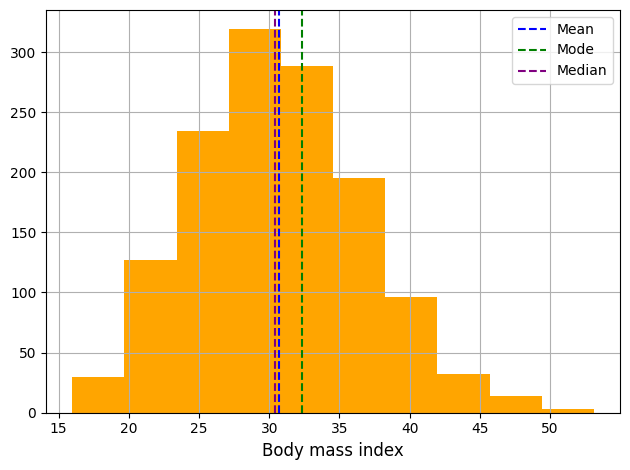

In [5]:
measure('bmi', 'Body mass index')

Mean:   13270.422
Mode:   1639.563
Median: 9382.033

Range:          62648.554
Std. deviation: 12110.011
IQR (numpy):    -11879.801
IQR (scipy):    11879.801


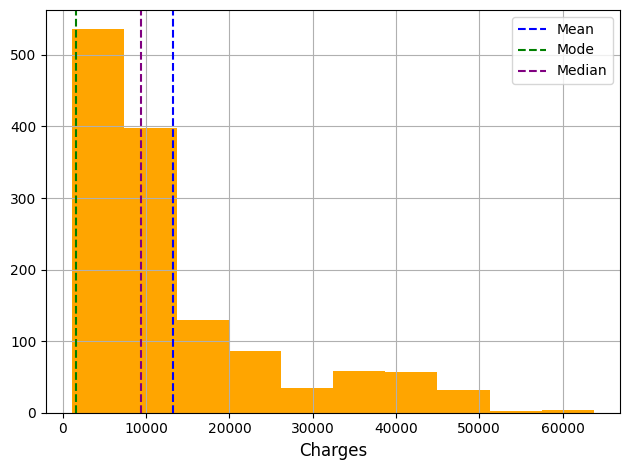

In [6]:
measure('charges', 'Charges')

### Задание 5
Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.

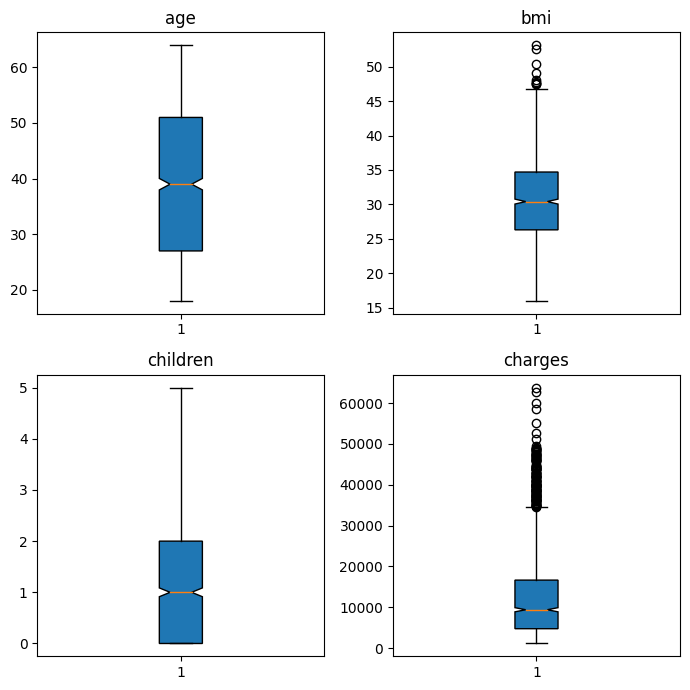

In [7]:
fig = plt.figure(figsize=(7, 7))
for i, index in enumerate([df['age'], df['bmi'], df['children'], df['charges']]):
    ax = fig.add_subplot(2, 2, 1 + i)
    ax.boxplot(index, patch_artist=True, notch=True)
    ax.set_title(index.name)

plt.tight_layout()
plt.show()

### Задание 6
Используя признак charges или imb, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы.

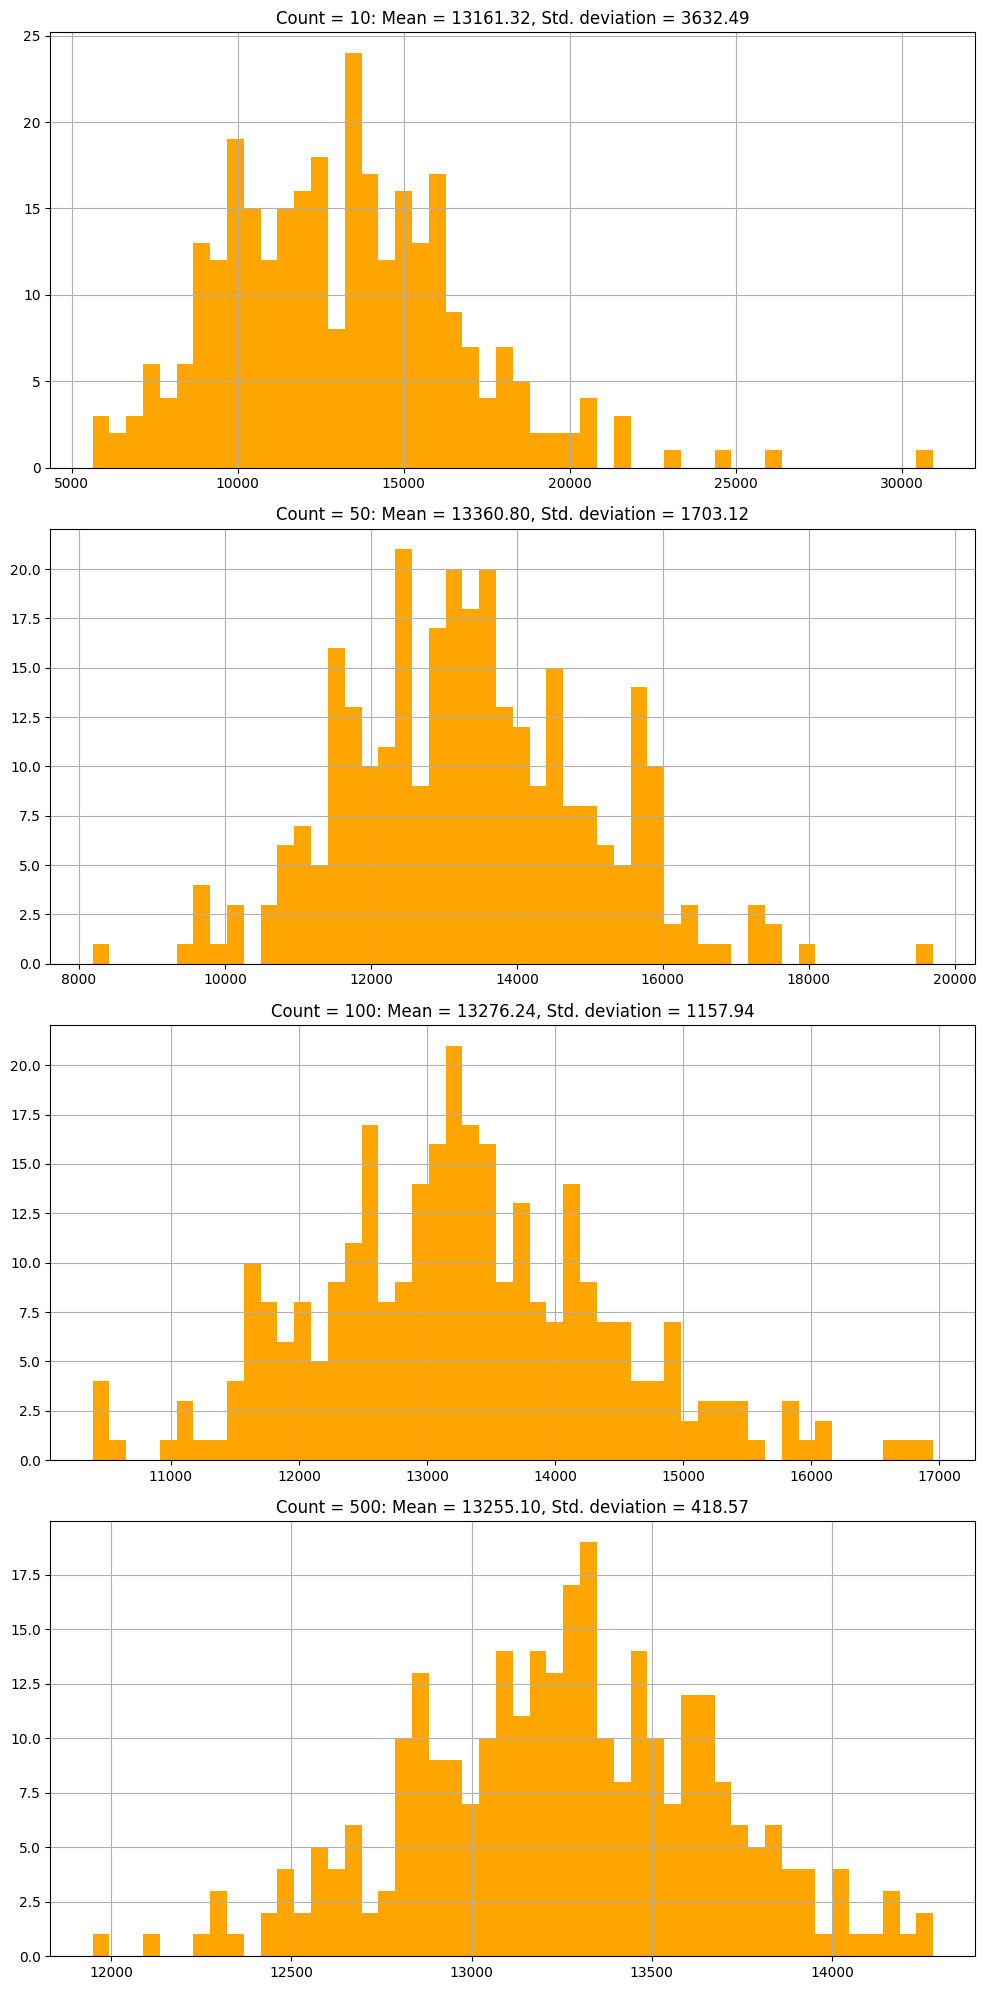

In [8]:
n_length = [10, 50, 100, 500]
n_samples = 300

fig, axs = plt.subplots(len(n_length), figsize=(10, 20))

for i, n in enumerate(n_length):
    means = []
    for _ in range(n_samples):
        sample = df['charges'].sample(n)
        means.append(sample.mean())

    axs[i].hist(means, color='orange', bins=50)
    axs[i].grid()
    axs[i].set_title(f'Count = {n}: '
                     f'Mean = {np.mean(means):.2f}, '
                     f'Std. deviation = {np.std(means):.2f}')

plt.tight_layout()
plt.show()


### Задание 7
Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

In [9]:
columns = ['charges', 'bmi']

def calcConfInts(col):
  data = df[col]
  mean = np.mean(data)
  stderr = sts.sem(data)  # Standard error mean
  dof = len(data) - 1  # Degrees of freedom
  conf_ints = {
    '95%': sts.t.interval(0.95, dof, loc=mean, scale=stderr),
    '99%': sts.t.interval(0.99, dof, loc=mean, scale=stderr)
  }
  print(f'{col}:\n'
        f'95% confidence interval: {conf_ints["95%"]}\n'
        f'99% confidence interval: {conf_ints["99%"]}')

for col in columns:
  calcConfInts(col)


charges:
95% confidence interval: (12620.954034192644, 13919.890496089869)
99% confidence interval: (12416.429943203952, 14124.414587078561)
bmi:
95% confidence interval: (30.336346903054107, 30.99044681891899)
99% confidence interval: (30.233355575431627, 31.09343814654147)


### Задание 8
Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.

charges:
KS-statistic: 0.1885
P-value: 0.0000
Normal distribution hypothesis rejected
bmi:
KS-statistic: 0.0261
P-value: 0.3145
Normal distribution hypothesis not rejected


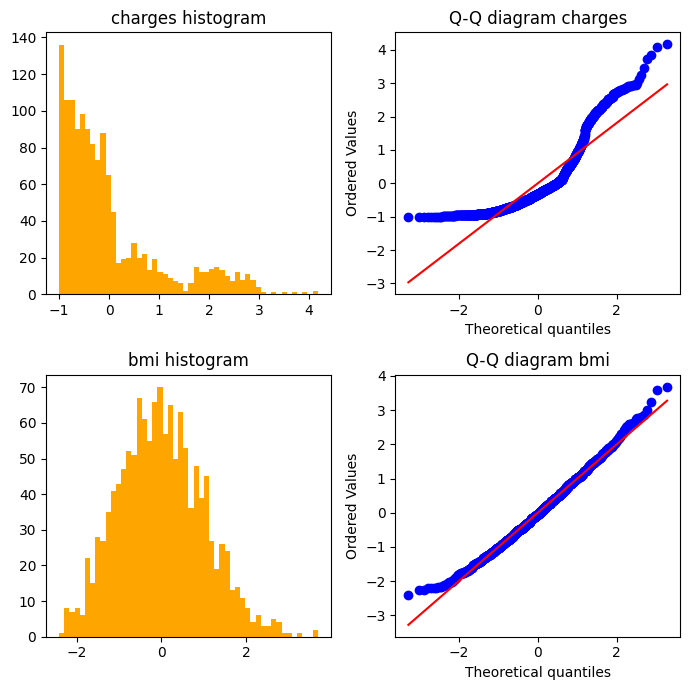

In [10]:
columns = ['charges', 'bmi']
fig = plt.figure(figsize=(7, 7))

def normalityCheck(i, col):
  # Standardisation and KS-test
  data = pd.Series(df[col])
  dataStand = StandardScaler().fit_transform(data.values.reshape(-1, 1)).flatten()
  KS_statistic, KS_pvalue = sts.kstest(dataStand, 'norm')
  
  # Histogram
  ax = fig.add_subplot(2, 2, 1 + i)
  ax.hist(dataStand, color='orange', bins=50)
  ax.set_title(f"{col} histogram")
  
  # Q-Q
  ax = fig.add_subplot(2, 2, 2 + i)
  sts.probplot(dataStand, plot=ax)
  ax.set_title(f"Q-Q diagram {col}")
  
  # Output
  print(f"{col}:")
  print(f"KS-statistic: {KS_statistic:.4f}")
  print(f"P-value: {KS_pvalue:.4f}")
  if KS_pvalue < 0.05:
    print("Normal distribution hypothesis rejected")
  else:
    print("Normal distribution hypothesis not rejected")

for i, col in zip(range(0, len(columns)*2, 2), columns):
  normalityCheck(i, col)

plt.tight_layout()
plt.show()

### Задание 9
Загрузить данные из файла `ECDCCases.csv`.

In [11]:
df = pd.read_csv("data/ECDCCases.csv")

### Задание 10
Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, "other"), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет.

In [12]:
missing_data = []
for col in df.keys():
    data = pd.Series(df[col])
    percent_missing = data.isna().sum() / data.size * 100
    missing_data.append('{:.2f}%'.format(percent_missing))

print(pd.Series(missing_data, index=df.keys()))

dateRep                                                       0.00%
day                                                           0.00%
month                                                         0.00%
year                                                          0.00%
cases                                                         0.00%
deaths                                                        0.00%
countriesAndTerritories                                       0.00%
geoId                                                         0.44%
countryterritoryCode                                          0.20%
popData2019                                                   0.20%
continentExp                                                  0.00%
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.65%
dtype: object


In [13]:
# Delete 2 with most n/a (Cumulative_... and geoId)
dfm2 = df.drop(columns=df.isna().sum().sort_values()[-2:].index.tolist())
dfm2.isna().sum()

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
countryterritoryCode       123
popData2019                123
continentExp                 0
dtype: int64

In [14]:
# Fill with default value
dfm2['countryterritoryCode'] = df['countryterritoryCode'].fillna('other')

# Fill with median value
dfm2['popData2019'] = df['popData2019'].fillna(df['popData2019'].median())
dfm2.isna().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

### Задание 11
Посмотреть статистику по данным, используя `describe()`. Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [15]:
display(df.describe())

print("Countries:", df[df['deaths'] > 3000]['countriesAndTerritories'].unique())
print("Days:", len(df[df['deaths'] > 3000]['dateRep'].unique()))


,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.178100e+04,59025.000000
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.098628e+07,66.316369
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.531246e+08,162.324550
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.561206
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


Countries: ['Argentina' 'Ecuador' 'Mexico' 'Peru' 'United_States_of_America']
Days: 11


### Задание 12
Найти дублирование данных. Удалить дубликаты.

In [16]:
print("Lines before dropping:", len(df.index))
df.drop_duplicates()

Lines before dropping: 61904


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
5,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


### Задание 13
Загрузить данные из файла `bmi.csv`. Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest. Сравнить средние значения этих выборок, используя t-критерий Стьюдента. Предварительно проверить выборки на нормальность (критерий Шопиро-Уилка) и на гомогенность дисперсии (критерий Бартлетта). 

In [17]:
df = pd.read_csv("data/bmi.csv")
nw_bmi = df[df['region'] == 'northwest']['bmi']
sw_bmi = df[df['region'] == 'southwest']['bmi']

In [18]:
# Normality test
nwShapiro = sts.shapiro(nw_bmi)
swShapiro = sts.shapiro(sw_bmi)

# Homogeneity test
bartlettTest = sts.bartlett(nw_bmi, sw_bmi)

# t-test
if nwShapiro.pvalue > 0.05 and swShapiro.pvalue > 0.05 and bartlettTest.pvalue > 0.05:
    # Corparison of mean values using t-criteria
    t_statistic, p_value = sts.ttest_ind(nw_bmi, sw_bmi)
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print("Sampling means are different (zero hypothesis rejected)")
    else:
        print("Sampling means are not different (zero hypothesis not rejected)")
else:
    print("Samplings do not qualify for t-test (conditions not met)")


t-statistic: -3.2844171500398582
p-value: 0.001076958496307695
Sampling means are different (zero hypothesis rejected)


Проверки пройдены успешно, средние значения различны.

### Задание 14
Кубик бросили 600 раз, получили следующие результаты:
| N | Количество выпадений |
| :-: | :-: |
| 1 | 97 |
| 2 | 98 |
| 3 | 109 |
| 4 | 95 |
| 5 | 97 |
| 6 | 104 |
    
С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию `scipy.stats.chisquare()`.


In [19]:
chi2_stat, p_value = sts.chisquare([97, 98, 109, 95, 97, 104], [100] * 6)
alpha = 0.05

print(f"Chi squared statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("Zero hypothesis rejected. Distribution not uniform.")
else:
    print("Zero hypothesis not rejected. Distribution uniform.")


Chi squared statistic: 1.4400
P-value: 0.9199
Zero hypothesis not rejected. Distribution uniform.


Полученное распределение является равномерным.

### Задание 15.
С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми.
Создать датафрейм, используя представленный ниже код.

Использовать функцию `scipy.stats.chi2_contingency()`.
Влияет ли семейное положение на занятость?

In [20]:
data = pd.DataFrame({'Женат': [89, 17, 11, 43, 22, 1],
                     'Гражданский брак': [80, 22, 20, 35, 6, 4],
                     'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]})

data.index = ['Полный рабочий день',
              'Частичная занятость',
              'Временно не работает',
              'На домохозяйстве',
              'На пенсии',
              'Учёба']

chi2_stat, p_value, _, _ = sts.chi2_contingency(data)
alpha = 0.05

print(f"Chi squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Zero hypothesis rejected. Family status and occupation correlated.")
else:
    print("Zero hypothesis not rejected. Family status and occupation not correlated.")


Chi squared statistic: 122.29654948595365
P-value: 1.7291616900960234e-21
Zero hypothesis rejected. Family status and occupation correlated.


Семейное положение и занятость между собой связаны.